<a href="https://colab.research.google.com/github/MNIKIEMA/Machine-learning-Airbnb/blob/main/prix_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'étude porte sur une base de données de la société RBNB relatives à 75 villes disponible en ligne sur http://insideairbnb.com/get-the-data.html .


# Présentation de la base

* **id** : Unique id (clé) désignant le
bien;
* **host_id** : Unique id (clé) désignant
le propriétaire du bien;
* **room_type** : Variable catégorielle
désignant le type de bien mise à
la location « Entire home/apt »,
« Private room » ou « Shared
room »;
* **neighbourhood** : Sous-région ou
quartier de la ville considérée;
* **accommodates** : Capacité
maximale de personnes pouvant
être accueilli dans
l’appartement
* **bedrooms** : Nombre de
chambres;
* **bathrooms** : Nombre de salle de
bains;
* **beds** : Nombre de lits
* **price** : Prix (en $) par nuit;
* **name** : titre de l’annonce;
* **latitude/longitude**



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_price = pd.read_csv("/content/listings_Beijing.csv",sep=";")

In [10]:
df = df_price.copy()

In [11]:
df.shape

(27439, 12)

* La base contient 27439 lignes et 12 colonnes.



In [12]:
df.head(10)

,id,host_id,room_type,neighbourhood,accommodates,bedrooms,bathrooms,beds,price,name,latitude,longitude
0,114384,533062,Entire home/apt,NaN,2,1.0,NaN,1.0,$628.00,CBD Luxury 1-bedroom suite with a 30m2 terrace,39.90474,116.46372
1,114465,533062,Entire home/apt,"Beijing, China",2,1.0,NaN,1.0,$614.00,国贸CBD中国尊梵悦108附近豪华总统套房睡3人/步行五分钟至地铁站万达广场沃尔玛,39.90441,116.46524
2,128496,467520,Entire home/apt,NaN,3,1.0,NaN,2.0,$388.00,Heart of Beijing: House with View 2,39.93235,116.42254
3,161902,707535,Entire home/apt,NaN,2,1.0,NaN,1.0,$552.00,cozy studio in center of Beijing,39.93357,116.43577
4,162144,707535,Entire home/apt,NaN,4,1.0,NaN,2.0,$600.00,"nice studio near subway, sleep 4",39.93668,116.43798
5,279078,1455726,Entire home/apt,NaN,2,1.0,NaN,1.0,$400.00,Nice Apartment in Beijing,39.93919,116.43440
6,287026,1456491,Entire home/apt,NaN,3,1.0,NaN,1.0,$418.00,Studio in downtown Beijing #2,39.94115,116.44122
7,317195,1455726,Entire home/apt,NaN,2,1.0,NaN,1.0,$548.00,"Sweet Apartment, Embassy Area",39.93916,116.43440
8,322292,1456491,Entire home/apt,NaN,2,1.0,NaN,1.0,$439.00,Cozy studio in downtown Beijing 舒适高层市中心公寓近三里屯交通方便,39.93849,116.44066
9,445306,2212388,Entire home/apt,NaN,6,2.0,NaN,2.0,$672.00,Apartment in the heart of Beijing,39.91342,116.41837


* Présence de symbole monétaire dans *price*
* Colonne *bathrooms* semble etre vide

In [13]:
df.dtypes.value_counts()

float64    5
object     4
int64      3
dtype: int64

In [14]:
df.dtypes

id                 int64
host_id            int64
room_type         object
neighbourhood     object
accommodates       int64
bedrooms         float64
bathrooms        float64
beds             float64
price             object
name              object
latitude         float64
longitude        float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27439 entries, 0 to 27438
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             27439 non-null  int64  
 1   host_id        27439 non-null  int64  
 2   room_type      27439 non-null  object 
 3   neighbourhood  17455 non-null  object 
 4   accommodates   27439 non-null  int64  
 5   bedrooms       27040 non-null  float64
 6   bathrooms      0 non-null      float64
 7   beds           27180 non-null  float64
 8   price          27439 non-null  object 
 9   name           27438 non-null  object 
 10  latitude       27439 non-null  float64
 11  longitude      27439 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 2.5+ MB


* La colonne **bathrooms** est une colonne vide, ainsi cette colonne peut etre supprimée.
* Les colonnes **id, host_id** et **name** ne seront pas inclues dans notre analyse.

In [16]:
del_col = ['id','host_id','bathrooms','name']

In [17]:
df.drop(del_col,axis=1,inplace=True)

##valeurs manquantes et types

In [18]:
type(df.loc[0,'price'])

str

* La variable **price** est importée en format charactère à cause de la présence du symbole $.

In [19]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [20]:
df['price'].head()

0    628.0
1    614.0
2    388.0
3    552.0
4    600.0
Name: price, dtype: float64

* On va vérifier le nombre de valeurs manquantes de chaque colonnne.

In [21]:
col_miss= [col for col in df.columns
           if df[col].isnull().any()]
print(col_miss)

['neighbourhood', 'bedrooms', 'beds']


* 3 colonnes contiennent des valeurs manquantes : **neighbourhood, bedrooms, beds**.

## Valeurs manquantes

In [22]:
100*(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood    36.386166
bedrooms          1.454135
beds              0.943912
longitude         0.000000
latitude          0.000000
price             0.000000
accommodates      0.000000
room_type         0.000000
dtype: float64

* La colonne **neighbourhood** contient 36% de valeurs manquantes.

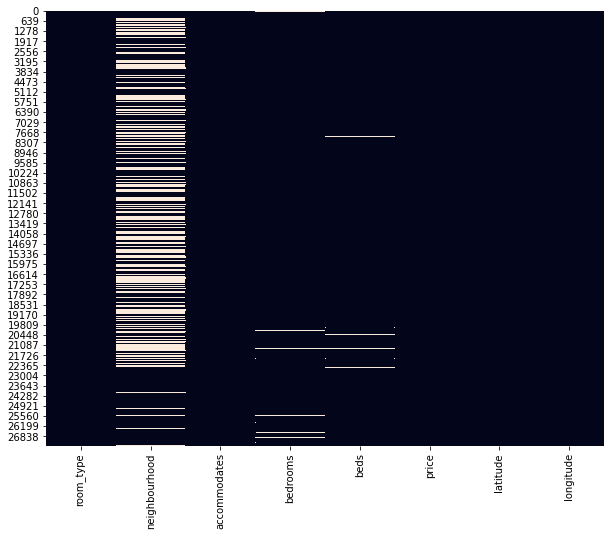

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(),cbar=False);

<Figure size 432x288 with 0 Axes>

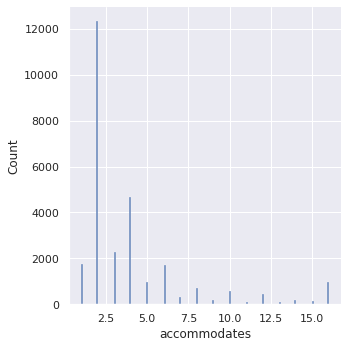

<Figure size 432x288 with 0 Axes>

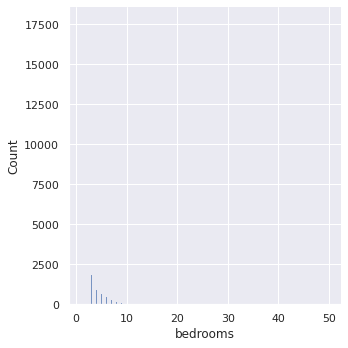

<Figure size 432x288 with 0 Axes>

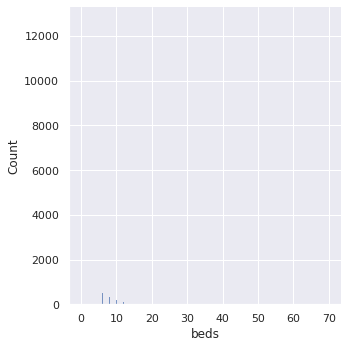

<Figure size 432x288 with 0 Axes>

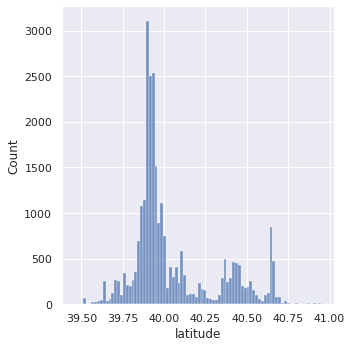

<Figure size 432x288 with 0 Axes>

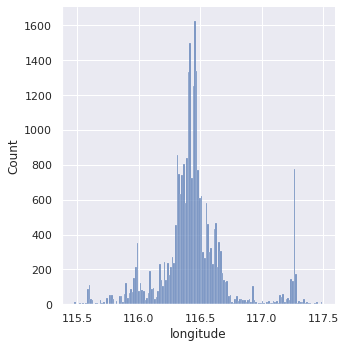

In [24]:
 sns.set_theme(style='darkgrid')
for col in df.drop('price',axis=1).select_dtypes(['float','int']):
  plt.figure()
  sns.displot(df[col])

* Les colonnes **accomodates, bedrooms** et **beds** sont quantitatives discrètes. Il sera preferable de faire des barplot.

In [25]:
quant_disc = ['accommodates','bedrooms','beds']

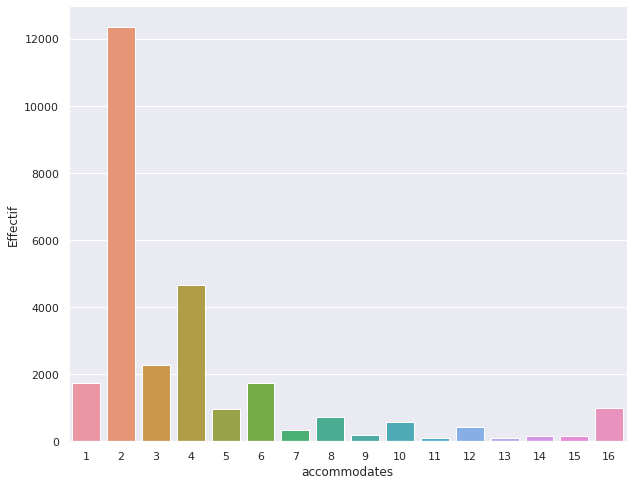

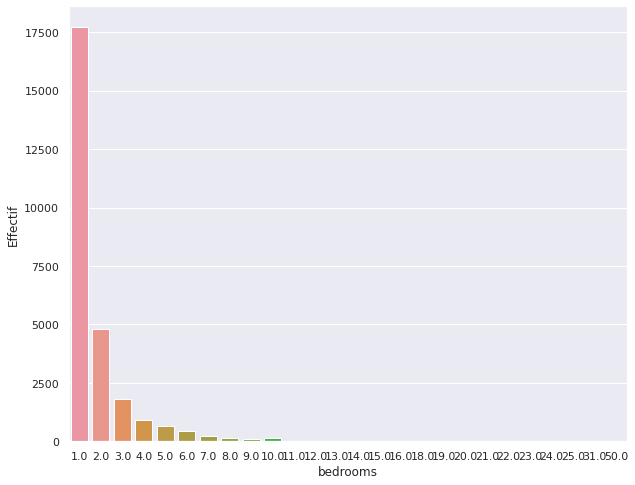

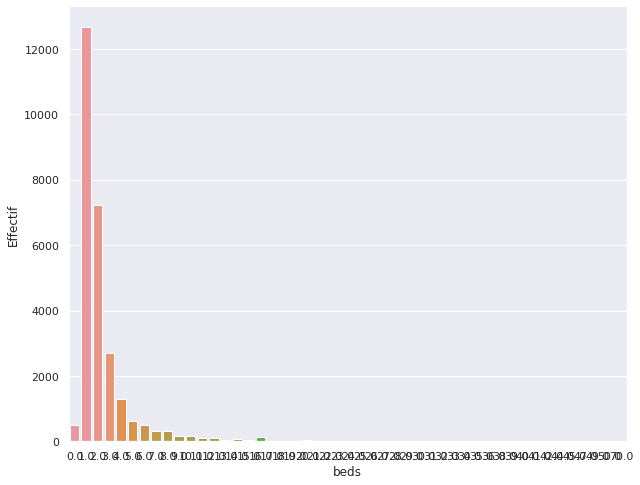

In [26]:
for col in quant_disc:
  plt.figure(figsize=(10,8))
  sns.countplot(x=col,data=df);
  plt.ylabel('Effectif');

In [27]:
for col in df.select_dtypes('object'):
  print(f'{col :-<50}{df[col].nunique()}')

room_type-----------------------------------------3
neighbourhood-------------------------------------27


* La variable neighbourhood a trop de modalités(27).

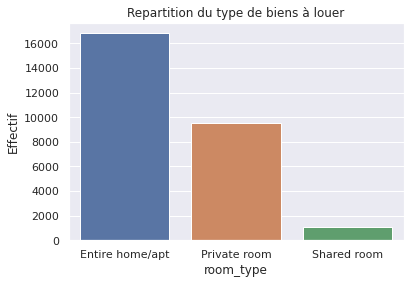

In [28]:
sns.countplot(x='room_type',data=df);
plt.ylabel('Effectif');
plt.title('Repartition du type de biens à louer');

- Les gens ont tendance à mettre en location des appartements entiers. Les champbres partagées sont minoritaires dans les annonces.

In [29]:
df['neighbourhood'].value_counts()

Beijing, China                        17329
Zhangjiakou, Hebei, China                34
Chaoyang Qu, Beijing Shi, China          30
Dongcheng Qu, Beijing Shi, China          9
Langfang, Hebei, China                    8
Xicheng Qu, Beijing Shi, China            7
Baoding, Hebei, China                     5
Yanqing Qu, Beijing Shi, China            5
Daxing Qu, Beijing Shi, China             3
Changchun, Jilin, China                   3
Haidian Qu, Beijing Shi, China            3
Yanqing District, Beijing, China          2
Shunyi Qu, Beijing Shi, China             2
Haidian District, Beijing, China          2
Shantou, Guangdong, China                 1
Mentougou Qu, Beijing Shi, China          1
海淀区, 北京市, China                           1
Ulanqab, Inner Mongolia, China            1
Fengtai Qu, Beijing Shi, China            1
Chengde, Hebei, China                     1
朝阳区, 北京市, China                           1
Beijing, Beijing Shi, China               1
Huairou Qu, Beijing Shi, China  

* Les annonces sont concentrées autour de Beijing.
* On peut donc omettre cette colonne de notre analyse pour l'instant.

In [30]:
df.drop('neighbourhood',axis=1,inplace=True)

## Discretisation de la variable *price*

In [31]:
df['price'].describe()

count    27439.000000
mean       927.246766
std       2434.330669
min          0.000000
25%        280.000000
50%        447.000000
75%        774.000000
max      99998.000000
Name: price, dtype: float64

* Le prix moyen des appartements est 927 dollars et un ecart type très élevé à 2394,58.
* Le prix maximal se situe à 99998 dollars.
* Le prix minimal est de 0 c'est à dire des hébergements gratuits.

## Visualisation de la variable prix et discrétisation

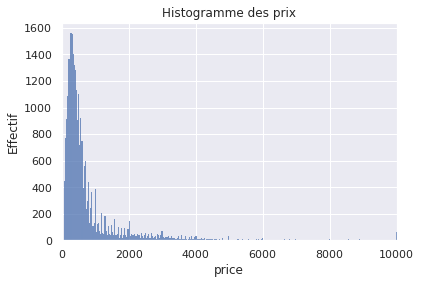

In [32]:
sns.histplot(data=df,x='price');
plt.xlim(left=0,right=10000)
plt.ylabel('Effectif');
plt.title('Histogramme des prix');

- On remarque que la plupart des prix ne dépasse pas 10000 dollars. Il y a aussi des biens gratuits parmis les annonces. Ce qui semble surprenant pour une grande métropole comme Beijing. Cela nous a conduit à faire quelques recherches sur le prix des biens à Beijing et nous avons trouvé un prix minimal de 8$ sur le site airbnb. Ainsi les annonces gratuites ainsi seront suprimées de la base dans la suite de l'analyse.

In [33]:
((df['price']<=10000) & (df['price']>0)).sum()/df.shape[0]

0.9954444403950581

- Les prix supérieurs 10000 sont inférieurs 1%, on peut donc supprimer ces valeurs de la base.

In [34]:
df = df[(df['price']>0)&(df['price']<=10000)]

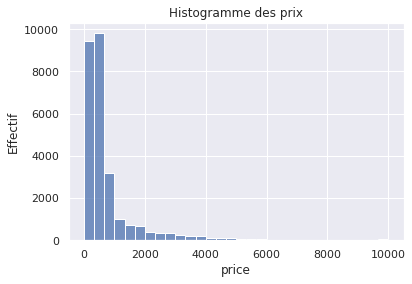

In [35]:
sns.histplot(data=df,x='price',bins=30);
plt.ylabel('Effectif');
plt.title('Histogramme des prix');

La segmentation du prix se fera de la manière suivante:
* **La catégorie 0** correspond aux 20% des premières valeurs de la variable prix.
* **La catégorie 1** correspond aux 30% des premières valeurs de la variable prix après la catégorie 0.
* **La catégorie 2** correspond aux 30% des premières valeurs de la variable prix après la catégorie 1.
* **La catégorie 3** correspond aux 20% des dernières valeurs de la variable prix.

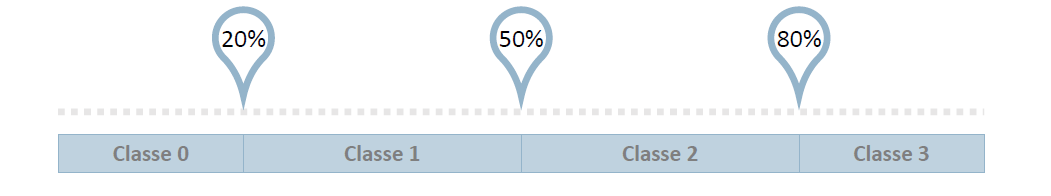

In [36]:
q_1= np.quantile(df.price,0.2)
q_2 = np.quantile(df.price,0.5)
q_3 = np.quantile(df.price,0.8)
print(q_1,q_2,q_3)

254.0 442.0 912.0


* On voit donc que la catégorie 0 correspond à 20% des biens les moins chers et la catégorie 3 correspond à 20% des biens les plus chers.

In [37]:
def price(pr,q_1= np.quantile(df.price,0.2),q_2= np.quantile(df.price,0.5),q_3= np.quantile(df.price,0.8)):
  if pr < q_1:
    return 'cat_0'
  elif (pr>=q_1) & (pr < q_2):
    return 'cat_1'
  elif (pr>=q_2) & (pr < q_3):
    return 'cat_2'
  else:
    return 'cat_3'

In [38]:
df['cat_price'] = df['price'].apply(price)

In [39]:
df.drop('price',axis=1,inplace=True)

In [40]:
df['bedrooms'].isnull().sum()

399


* La colonne *bedrooms* est une variable quantitative discrète et contient  399 valeurs manquantes.
* On peut remplacer ces valeurs manquantes par la médiane.

In [41]:
m_b = df['bedrooms'].value_counts().index[0]
df['bedrooms'].fillna(m_b,inplace=True)

## Cas des valeurs abérantes

**Cas de la variable bedrooms**

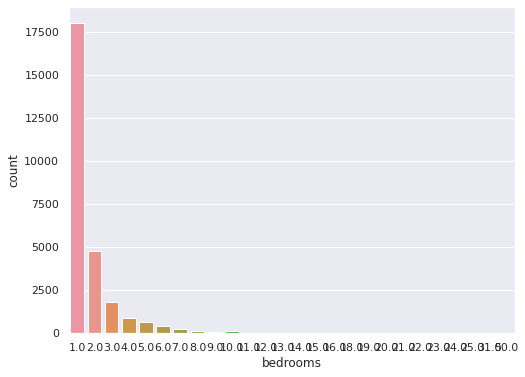

In [42]:
 plt.figure(figsize=(8,6))
 sns.countplot(x='bedrooms',data=df);

* La plupart des biens ont moins 10 chambres dans cette base. Voyons la proportion des biens ayant des chambres supérieurs à 10.



In [43]:
(df['bedrooms']<=10).sum()/(df.shape[0]), (df['bedrooms']>10).sum()/(df.shape[0])

(0.9969978765468258, 0.0030021234531741963)

* Les biens ayant des chambres supérieurs à 10 sont environ 2%. 
* Les biens ayant des chambres supérieurs seront considéres comme des valeurs abérrantes et exclues de notre analyse.
* On décide de ne conserver que les logements ayant un nombre de chambre inférieur ou égal à 10.

In [44]:
df = df[df['bedrooms']<=10]

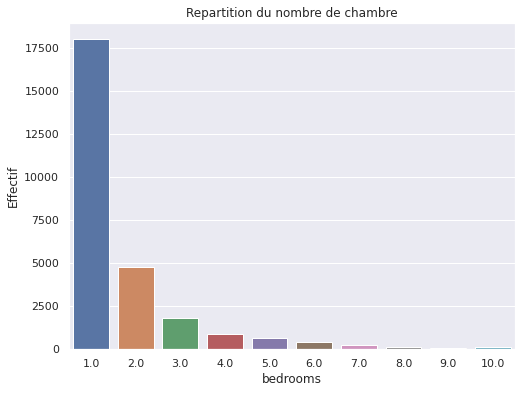

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', data=df[df['bedrooms']<=10]);
plt.ylabel('Effectif');
plt.title('Repartition du nombre de chambre');

* Les habitants de Beijing mettent majoritairement en location des biens avec une chambre.

In [46]:
df['beds'].isna().sum()

257

* La colonne beds contient 259 valeurs manquantes et on décide de les remplacer par la médiane.


In [47]:
mde = df['beds'].median()
df['beds'] = df['beds'].fillna(mde)

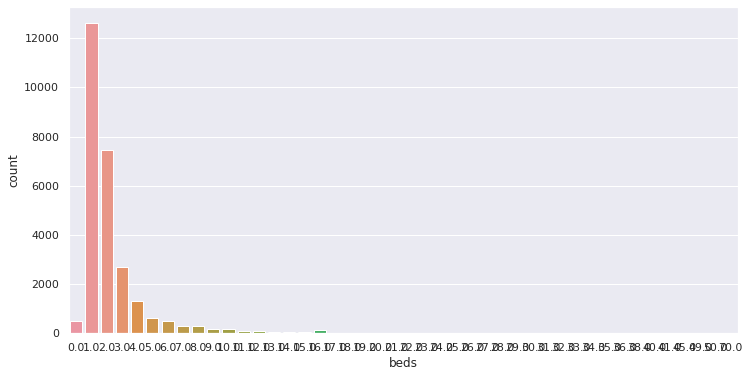

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='beds',data=df);

In [49]:
(df['beds']<=12).sum()/(df.shape[0]), (df['beds']>12).sum()/(df.shape[0])

(0.9857153349001175, 0.014284665099882491)

* Les biens ont en général un nombre de lits inférieur à 12.

In [50]:
df = df[df['beds']<=12]

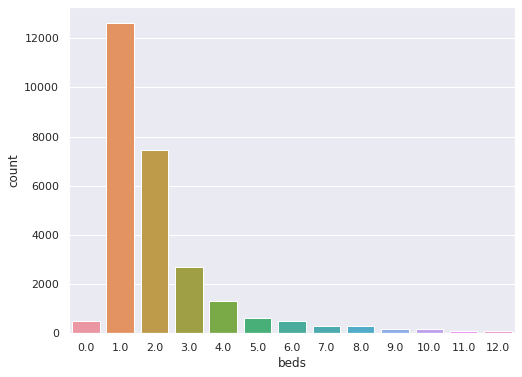

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='beds');

* Tout d'abord, on remarque l'existence des biens mis en location qui n'ont pas de lits.Cependant on n'a pas d'information pour savoir ce qu'il s'agit réellement. Les biens avec un lit sont prépondérants suivi des biens avec deux lits.

**Analyse de la variable cible**

In [52]:
df['cat_price'].value_counts()

cat_2    8181
cat_1    8157
cat_0    5372
cat_3    5133
Name: cat_price, dtype: int64

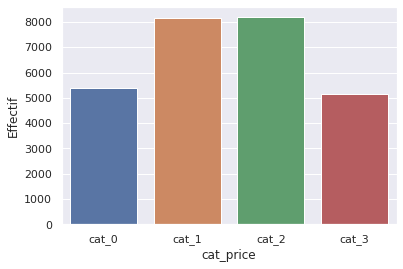

In [53]:
sns.countplot(x='cat_price',data=df,order=['cat_0','cat_1','cat_2','cat_3']);
plt.ylabel('Effectif');

In [54]:
df['room_type'].describe()

count               26843
unique                  3
top       Entire home/apt
freq                16423
Name: room_type, dtype: object

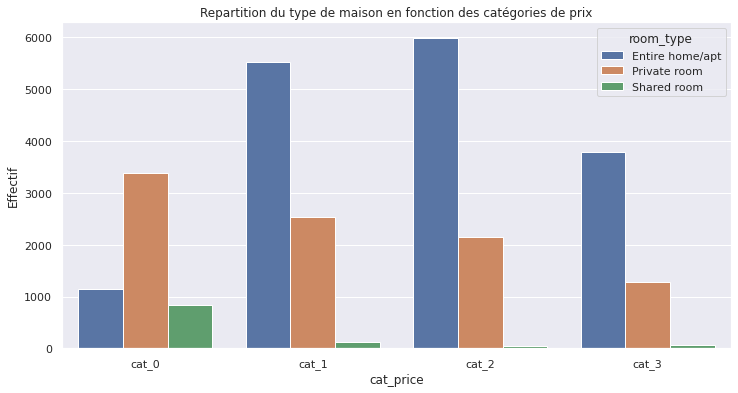

In [55]:
plt.figure(figsize=(12,6))
#df['room_type'].astype('category')
sns.countplot(x='cat_price',data=df,hue='room_type',order=['cat_0','cat_1','cat_2','cat_3'],
              hue_order=['Entire home/apt','Private room','Shared room']);
plt.title('Repartition du type de maison en fonction des catégories de prix');
plt.ylabel('Effectif');

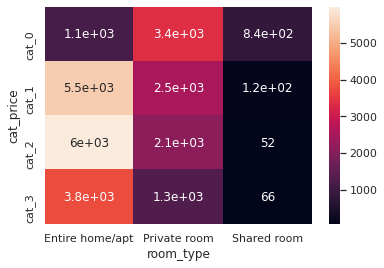

In [56]:
sns.heatmap(pd.crosstab(df['cat_price'],df['room_type']),annot=True);

* La première catégorie du prix se distingue des autres par une dominance des chambres privées.  Les autres catégories sont caractérisées par la dominance des appartements entiers.
* Les chambres partagées sont minoritaires quelque soit la catégorie des prix.
 

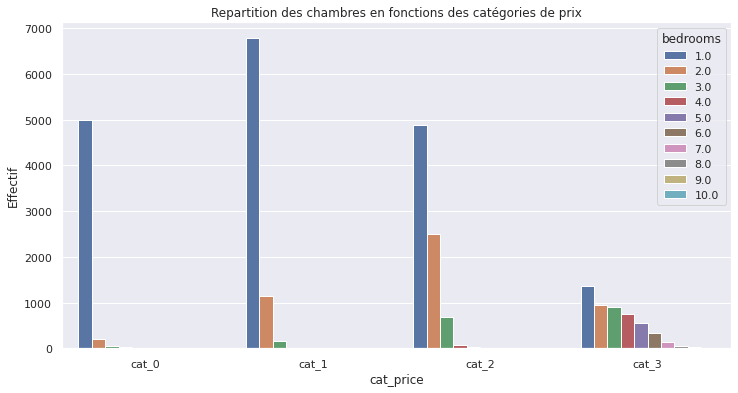

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x='cat_price',hue='bedrooms',
              data=df,order=['cat_0','cat_1','cat_2','cat_3']);
plt.title('Repartition des chambres en fonctions des catégories de prix');
plt.ylabel('Effectif');

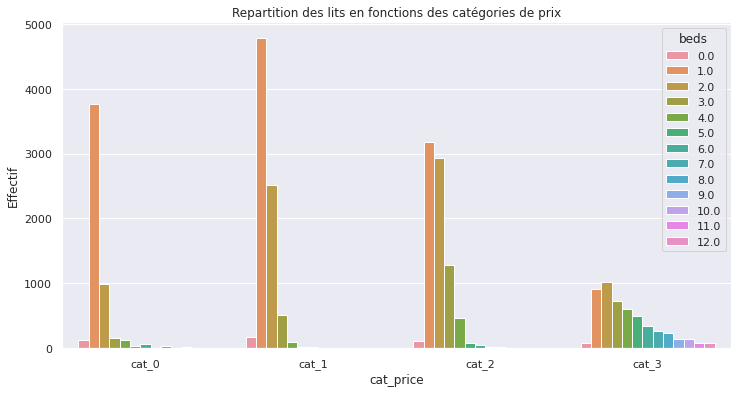

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='cat_price',hue='beds',data=df,
              order=['cat_0','cat_1','cat_2','cat_3']);
plt.title('Repartition des lits en fonctions des catégories de prix');
plt.ylabel('Effectif');

* Le nombre de lits a tendance à augmenter avec le prix. Néamoins on voit l'apparition des biens sans lits dans la dernière catégorie.

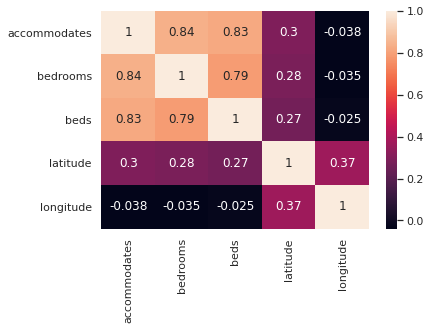

In [59]:
sns.heatmap(df.corr(),annot=True);

* Fortes corrélations entre les variables **accommodates, bedrooms, beds**.

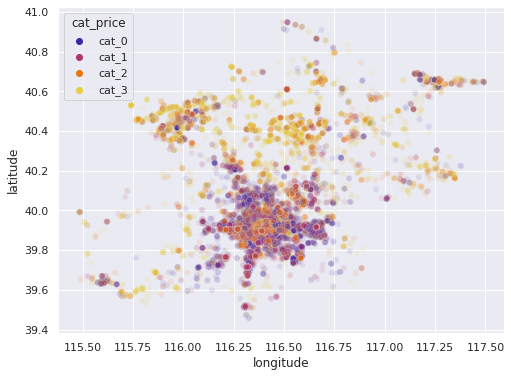

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude',y='latitude',hue='cat_price',
                hue_order=['cat_0','cat_1','cat_2','cat_3'],
                data=df,palette='CMRmap',alpha=0.1);
#plt.annotate('BEIJING', xy=(116.407526, 39.90403), xytext=(0, 20),
             #arrowprops=dict(facecolor='black', shrink=0.05));

* Forte concentration des annonces autour de la longitude 116,50 et la latitude 40, c'est à dire proche de Beijing.
* Les prix moins chers sont situés aux environs de Beijing tandis que les plus chers sont en périphérie.

## Machine learning

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report,auc
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [62]:
num_var = ['latitude','longitude']
cat_var = ['room_type','accommodates','bedrooms','beds']

In [63]:
def encodage(df):
  mon_label = {'cat_0':0,'cat_1':1,'cat_2':2,'cat_3':3,
             'Entire home/apt':3,'Private room':2,'Shared room':1}
  for col in df.select_dtypes('object').columns:
   df.loc[:,col]=df[col].map(mon_label)
  return df

In [64]:
def preprocessing(df):
  df = encodage(df)
  X = df.drop('cat_price',axis=1)
  y = df['cat_price']
  return X, y

In [65]:
df_train,df_test = train_test_split(df,test_size =0.2)

In [66]:
df_test.shape

(5369, 7)

In [67]:
df_train['cat_price'].value_counts()

cat_2    6526
cat_1    6519
cat_0    4314
cat_3    4115
Name: cat_price, dtype: int64

In [68]:
X_train, y_train = preprocessing(df_train)
X_test, y_test = preprocessing(df_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [69]:
model = make_pipeline(RandomForestClassifier(random_state=0))

In [70]:
def evalution(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  
  N, train_score,val_score = learning_curve(model,X_train,y_train,cv=4,
                                            train_sizes = np.linspace(0.1,1,10))
  plt.figure(figsize=(10,8))
  plt.plot(N,train_score.mean(axis=1),label='train score')
  plt.plot(N,val_score.mean(axis=1),label='val_score')
  plt.legend()

[[ 744  229   52   33]
 [ 245 1035  310   48]
 [  68  314 1105  168]
 [  51   60  206  701]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1058
           1       0.63      0.63      0.63      1638
           2       0.66      0.67      0.66      1655
           3       0.74      0.69      0.71      1018

    accuracy                           0.67      5369
   macro avg       0.68      0.67      0.67      5369
weighted avg       0.67      0.67      0.67      5369



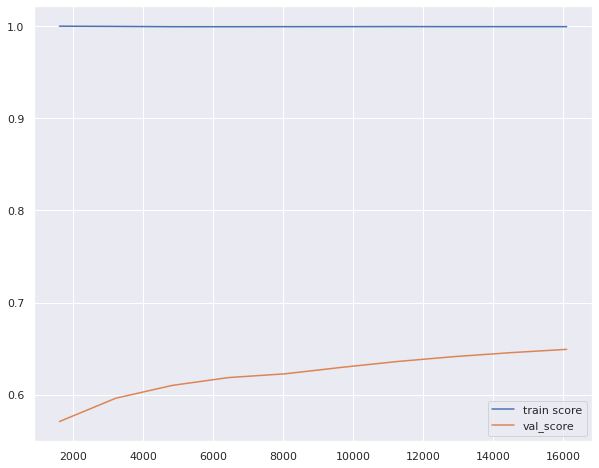

In [71]:
evalution(model)

- On voit apparaitre un phénomène d'overfitting

In [72]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

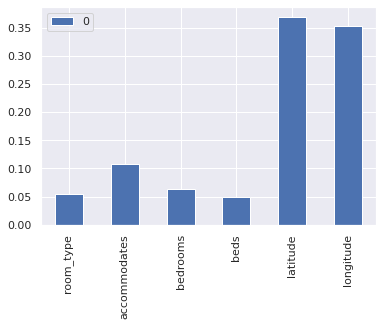

In [73]:
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar();

* Il semble que la variable **beds** est la moins importante pour cette analyse. Une explication pour etre sa forte corrélation avec la variable **bedrooms**. On remarque aussi que la variable **room_type** est à la limite du seuil de **5%**.

- Test de quelques méthodes

In [74]:
preprocessor = make_pipeline(SelectKBest(f_classif,k=5))
KNN = make_pipeline(preprocessor,
                    KNeighborsClassifier(n_neighbors=10))
Adaboost = make_pipeline(preprocessor,
                         AdaBoostClassifier())
GradientB = make_pipeline(preprocessor,
                          GradientBoostingClassifier())

* Une variable ne contribue pas fortement à la prédiction du prix. C'est pourquoi nous allons utiliser la fonction *SelectKBest* pour sélectionner les 5 meilleurs prédicteurs.

In [75]:
list_model = {'KNN':KNN,
              'Adaboost':Adaboost,
              'GradientB':GradientB}

KNN
[[ 746  213   71   28]
 [ 296  977  324   41]
 [  97  391 1014  153]
 [  72   87  251  608]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1058
           1       0.59      0.60      0.59      1638
           2       0.61      0.61      0.61      1655
           3       0.73      0.60      0.66      1018

    accuracy                           0.62      5369
   macro avg       0.64      0.63      0.63      5369
weighted avg       0.63      0.62      0.62      5369

Adaboost
[[653 306  69  30]
 [305 815 491  27]
 [149 456 928 122]
 [ 82  91 335 510]]
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      1058
           1       0.49      0.50      0.49      1638
           2       0.51      0.56      0.53      1655
           3       0.74      0.50      0.60      1018

    accuracy                           0.54      5369
   macro avg       0.57      0.54      0.55      5369
we

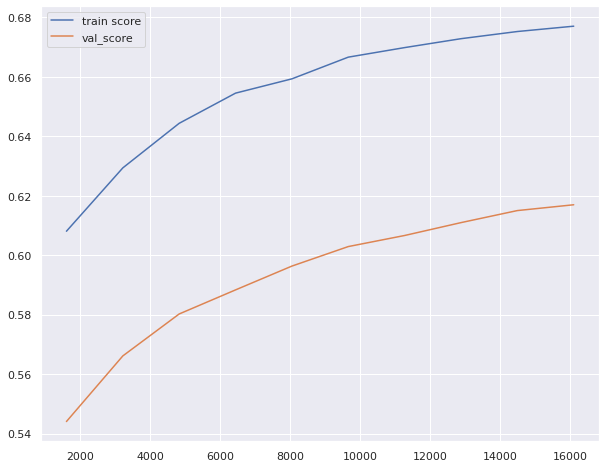

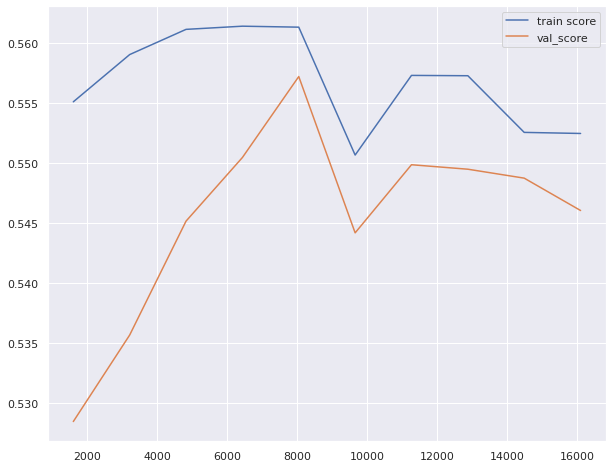

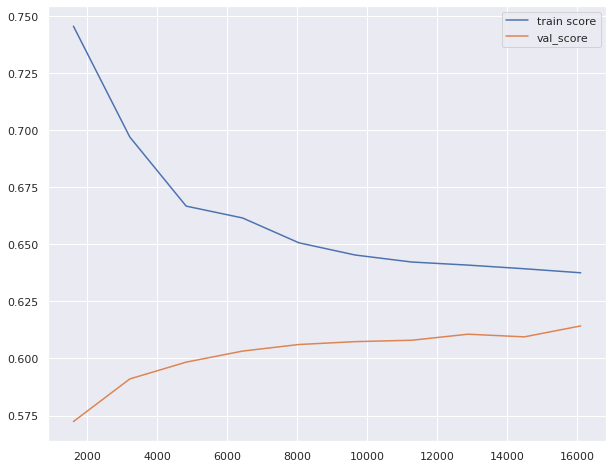

In [76]:
for name, model in list_model.items():
    print(name)
    evalution(model)

* Le problème d'over fiting n'apparait pas dans les autres modèles mais avec des scores relativement moyen.
* On va optimiser le gradient boosting qui est très interressant à étudier.

In [77]:
hyper_param = {'gradientboostingclassifier__learning_rate':[0.1, 0.15,0.2],
               'gradientboostingclassifier__max_depth':[5,10,30]
               }

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [79]:
grid = GridSearchCV(GradientB,param_grid=hyper_param,cv=4)

In [80]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('gradientboostingclassifier',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurit

In [81]:
grid.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__max_depth': 10}

In [82]:
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 779  197   60   22]
 [ 256 1021  323   38]
 [  72  312 1126  145]
 [  45   66  225  682]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.70      1058
           1       0.64      0.62      0.63      1638
           2       0.65      0.68      0.66      1655
           3       0.77      0.67      0.72      1018

    accuracy                           0.67      5369
   macro avg       0.68      0.68      0.68      5369
weighted avg       0.67      0.67      0.67      5369



* Le gradient boosting permet d'avoir des meilleurs résultats

## Conclusion

Ce projet nous a bel et bien permis d’aller plus en profondeur sur les différentes notions
abordées en cours et également, nous avons appris à bien se familiariser avec la manipulation
des outils de machine learning. Pour se ramener à un problème de classification
nous avons segmenter la variable d’intérêt en quatre classes. Ensuite, nous avons fait une analyse exploratoire des données et terminer par la modélisation avec plusieurs algorithmes de machine learning. On constate que le
meilleur modèle qui a été retenu est le GradientBoosting-Classifier. Ce modèle a un score relartivement bas.
Des données supplémentaires et un pré-traitement plus avancé des données peuvent nous permettre d'améliorer le score.